# Forecasting Stocks Prices with Prophet

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

## About the data

<br>

You are provided with a time series containing the stock prices of Microsoft from the beginning of 2010 to the end of 2019. This dataset was already pre-processed to exclude missing values and is provided in the form of a CSV file. The table below shows the columns in the given file.

| Date          | Price       |
|:-------------:| -----------:|
| 2009-12-31    | 23.541967   |
| 2010-01-04    | 23.904987   |
| 2010-01-05    | 23.912704   |
| 2010-01-06    | 23.765959   |
| ...           | ...         |

<br>

## About the assignment

<br>

The Prophet forecasting tool is suited to be used on simple time series that present such qualities as having a trend, a seasonal component, and outliers occurring at specific times.

In this assignment, we will hands-on test the predictive power of Prophet on a more complex time series - namely, stock prices. Throughout the exercise, we will fit the model on a historical price series of a specific stock and see how accurate are the forecasts compared to observed historical prices during that time. Finally, we will explore how the Prophet model fit can be assessed and visualized.

There are many time series related to the financials of a company that follow simpler patterns that are easier to forecast. Here are a few: number of daily shipments made by a company, number of daily visitors in a shop/office, number of airline passengers etc. For such time series the Prophet tool might uncover more insights from the data. However, in this assignment, we explore the capabilities of Prophet on time series showing a complex behaviour affected by many information sources.

## Setup

<br>

To complete this assignment, we will import `numpy` and `pandas` for all the data manipulation tasks.

We will also need the `prophet` library to use the Prophet model. 

The model itself is implemented in the `Prophet` module of the mentioned package. We'll be using a few useful functions from the `diagnostics` module of the library as well.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

from prophet import Prophet
from prophet.diagnostics import performance_metrics,cross_validation
from prophet.plot import plot_cross_validation_metric

/var/folders/00/h4l_zl594z1g4kp3qw9d3bdc0000gn/T/ipykernel_98609/179126655.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data

<br>

Let's load the dataset from `data/microsoft_prices.csv` into a pandas DataFrame.

We can also inspect the loaded dataset with `.head()`, `.shape`, and other methods of choice.

In [2]:
# Load the dataset
microsoft_prices = pd.read_csv('data/microsoft_prices.csv')

# Check the first few observations
microsoft_prices.head()

,Date,Price
0,2009-12-31,23.541967
1,2010-01-04,23.904987
2,2010-01-05,23.912704
3,2010-01-06,23.765959
4,2010-01-07,23.518799


Our dataset has observations that range from day `2009-12-31` till day `2019-12-31`, exactly 10 years. It doesn't contain records for the weekends and holidays, as the stocks market was not operating during those days.

**Q1. Count the number of daily observations in the dataset. Save the result in the `number_daily_observations` variable.**

<br>

In [3]:
microsoft_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Price   2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


<Axes: >

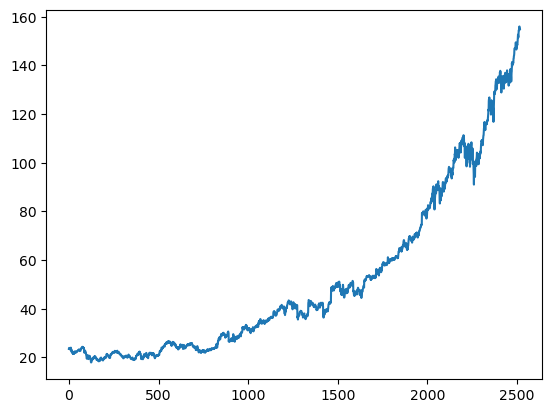

In [4]:
microsoft_prices.Price.plot()

In [5]:
microsoft_prices['Date'].value_counts().unique()

array([1])

In [6]:
# Your code here
number_daily_observations = len(microsoft_prices)


## Prepare the Data

We need to prepare the data to fit in the Prophet model, as it requires specific names for columns in a DataFrame. A column with time should be labelled as `ds`, and the column with prices should be labelled as `y`.

**Q2. Prepare the data from the `microsoft_prices` variable to fit the Prophet model. The current column `Date` should be named `ds`, and the `Price` column should be named `y`. Save the resulting DataFrame in a new variable `micorsoft_prices_prep`.**

<br>

In [7]:
# Your code here
microsoft_prices_prep = microsoft_prices.rename(columns={'Date': 'ds', 'Price': 'y'})


In [8]:
# Check DataFrame with new column naming

# Your code here
microsoft_prices_prep.head()

,ds,y
0,2009-12-31,23.541967
1,2010-01-04,23.904987
2,2010-01-05,23.912704
3,2010-01-06,23.765959
4,2010-01-07,23.518799


In [9]:
microsoft_prices_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2517 non-null   object 
 1   y       2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


To assess the capabilities of the model to forecast the data, we will split our dataset into two subsets. The first will be used to fit the model. We will compare the forecasts of the model to the values from the second dataset.

Let's keep 1 year of data for testing. Then, the training dataset will contain 9 years of data.

**Q3. Split the DataFrame `microsoft_prices_prep` into two non-overlapping datasets. The dataset with the training data should be stored in a new variable `data_train` and contain observations in time range ['2009-12-31':'2018-12-31']. The dataset with the test data should be stored in a new variable `data_test` and contain observations in time range ['2019-01-02':'2019-12-31'].**

**Note:** We don't have observations for each calendar day (the weekends and the holidays are excluded), so one year is not exactly 365 days in the dataset.

After this is done, count the number of observations in the test dataset, as we'll need to generate the same number of forecasts later. 

<br>

In [10]:
# Your code here
data_train = microsoft_prices_prep[(microsoft_prices_prep['ds'] >= '2009-12-31') & (microsoft_prices_prep['ds'] <= '2018-12-31')]
data_test = microsoft_prices_prep[(microsoft_prices_prep['ds'] >= '2019-01-02') & (microsoft_prices_prep['ds'] <= '2019-12-31')]


Let's check that our datasets do not intersect - look at the `.tail()` of `data_train` and `.head()` of `data_test`.

In [11]:
# Your code here
data_train.tail()

,ds,y
2260,2018-12-24,91.023140
2261,2018-12-26,97.240913
2262,2018-12-27,97.840439
2263,2018-12-28,97.076523
2264,2018-12-31,98.217575


In [12]:
data_test.head()

,ds,y
2265,2019-01-02,97.782425
2266,2019-01-03,94.185219
2267,2019-01-04,98.565697
2268,2019-01-07,98.691406
2269,2019-01-08,99.406975


And count the number of observations in the test dataset, as we'll need to generate the same number of forecasts. 

In [13]:
# Your code here
len(data_test)
print(f'Lengh of the test dataset is {len(data_test)}')

Lengh of the test dataset is 252


## Fit the Prophet model

Now is the time to fit the Prophet model using the training dataset. We will be using standard parameters of the Prophet model (no additional input needed) to fit it to the data.

After we fit a model, the internal parameters of our model will be updated, and we can access them. We are interested in the `.params` attribute that stores the result of the fitting process. *This attribute is stored as in a form of a dictionary.*

**Q4. Instantiate a new `Propet` object (from the `prophet` library) without any additional parameters. Then call it's `.fit` method on a `data_train` dataset. Finally, access the `.params` attribute of your `Prophet` object and save it in a new variable `prophet_params`.**

<br>

In [14]:
# Your code here
forecast_model = Prophet()
forecast_model.fit(data_train)
prophet_params = forecast_model.params


16:44:21 - cmdstanpy - INFO - Chain [1] start processing
16:44:21 - cmdstanpy - INFO - Chain [1] done processing


Uncomment the code below to check the keys and the values of this attribute.

In [15]:
# Your code here
print('Keys of the params attribute:', prophet_params.keys())
print('Trend values calculated by the model:',  prophet_params['trend'])

Keys of the params attribute: odict_keys(['lp__', 'k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])
Trend values calculated by the model: [[0.208522 0.208031 0.207908 ... 0.990272 0.990968 0.993058]]


## Generate forecast for the test period

Now that we fit the model, the forecast can be generated for the specified number of new observations. As our `data_test` DataFrame contains 252 observations (number of trading days in the year 2019), we'll be generating a forecast for that number of steps.

To proceed, we should provide the model with a series of times for which we want the forecast to be generated. Note that Propet requires these series to contain both times for which we already observed a value and those for which we want to generate a forecast value.

One way to generate such series is to use a helper method `.make_future_dataframse` of the `Prophet` class and provide it with a number of observations for which we want a forecast.

**Q5. Call the `.make_future_dataframse` method on your existing `Propet` object to generate 252 new periods. Save the output of this method in a new variable `generated_future_dates`.**

<br>

In [16]:
# Your code here
generated_future_dates = forecast_model.make_future_dataframe(periods=252)


Now, if we check the dates that were generated by the method and compare them to the dates from our `data_test` DataFrame, we'll see that they don't quite match.

Look at the `.tail()` of `generated_future_dates` and the `.tail()` of `data_test[['ds']]`.

In [17]:
# Your code here
generated_future_dates.tail()

,ds
2512,2019-09-05
2513,2019-09-06
2514,2019-09-07
2515,2019-09-08
2516,2019-09-09


In [18]:
data_test[['ds']].tail()

,ds
2512,2019-12-24
2513,2019-12-26
2514,2019-12-27
2515,2019-12-30
2516,2019-12-31


This is because the helper method of the `Prophet` class added the first 252 calendar days of the year, and we want to make forecasts for the 252 trading days of the year. To avoid issues when comparing the forecasts to historical observations later, let's generate the series of times that would suit our case.

**Q6. Generate a pandas DataFrame containing dates from the `data_train` and `data_test` datasets. Store this DataFrame in a new variable `future_dates`. Your DataFrame should contain only one column named `ds`, exactly as in the `generated_future_dates` variable.**

<br>

In [19]:
# Your code here
future_dates = pd.concat([data_train[['ds']], data_test[['ds']]])


Let's check that the generated DataFrame contains needed dates.

Look at the `.tail()` of `future_dates` and the `.tail()` of `data_test[['ds']]`.

In [20]:
# Your code here
future_dates.tail()

,ds
2512,2019-12-24
2513,2019-12-26
2514,2019-12-27
2515,2019-12-30
2516,2019-12-31


Now we have everything ready to generate a forecast!

For this, we'll be using a `.predict` method to which we'll pass the DataFrame containing the dates that we generated in the previous step. The output of this method will be a forecast DataFrame.

The forecast can be plotted using a `.plot` method, to which we pass our forecast DataFrame.

**Q7. Call the `.predict` method on your existing Propet object to generate a forecast for the dates in the `future_dates` variable. Save the output of this method in a new variable `model_predictions`. Also, run the `.plot` method, passing the `model_predictions` variable and save the output in a new variable `forecast_plot`.**

<br>

/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


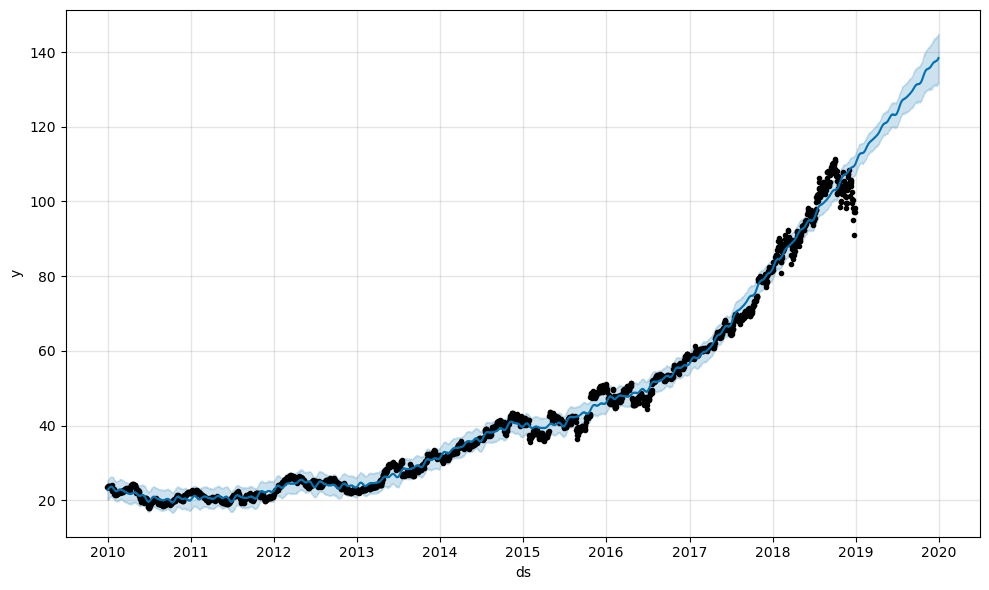

In [21]:
# Your code here
model_predictions = forecast_model.predict(generated_future_dates)
forecast_plot = forecast_model.plot(model_predictions)


Now we can analyse the forecast that we got from the model.

Our data contains no visible seasonality, only slight fluctuations that appeared through the years. Nevertheless, the model detected the general trend in thiese price series. It is also forecasted that this upward trend will continue in the future (despite the last observations in 2018 showing a decrease in price).

It should be noted that we should be careful when using such tools to predict any complex time series. We are missing many parameters that affect the stock price.

It's not advised to use this raw model to make investment decisions. However, it is useful to detect a general trend in time series, as in this case.

Let's see which columns do we have as an output of our forecast DataFrame from the previous question and explore how we can use them.

Check the `.columns` and the `.tail()` of `model_predictions`.

In [22]:
# Your code here
columns = model_predictions.columns
columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [23]:
model_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2512,2019-12-24,138.297231,130.868428,144.170388,132.317247,144.484955,-0.539077,-0.539077,-0.539077,-0.007848,-0.007848,-0.007848,-0.531229,-0.531229,-0.531229,0.0,0.0,0.0,137.758154
2513,2019-12-26,138.452298,131.170170,144.354032,132.426766,144.677837,-0.606283,-0.606283,-0.606283,-0.048140,-0.048140,-0.048140,-0.558143,-0.558143,-0.558143,0.0,0.0,0.0,137.846015
2514,2019-12-27,138.529832,131.918328,144.399676,132.423654,144.789332,-0.594731,-0.594731,-0.594731,-0.037998,-0.037998,-0.037998,-0.556733,-0.556733,-0.556733,0.0,0.0,0.0,137.935101
2515,2019-12-30,138.762433,131.455091,144.550601,132.611944,145.055894,-0.570000,-0.570000,-0.570000,-0.081812,-0.081812,-0.081812,-0.488188,-0.488188,-0.488188,0.0,0.0,0.0,138.192432
2516,2019-12-31,138.839966,131.864883,144.837638,132.635648,145.167389,-0.451914,-0.451914,-0.451914,-0.007848,-0.007848,-0.007848,-0.444066,-0.444066,-0.444066,0.0,0.0,0.0,138.388052


There are many parameters here, and it's easy to get lost. Let's explore their meaning and how they can be helpful to us:

| Parameter                    | Description                                                |
|:----------------------------:| ----------------------------------------------------------:|
| ds                           | Time of the observation/forecast                           |
| trend                        | Trend component of the observation/forecast                |
| additive_terms               | Additive component of the observation/forecast             |
| multiplicative_terms         | Multiplicative component of the observation/forecast       |
| _XYZ_\_upper                 | Upper uncertainly interval of _XYZ_ paremeter              |
| _XYZ_\_lower                 | Lower uncertainly interval of _XYZ_ paremeter              |


Now, before we move further and explore the components of the forecast, there is an interesting application of the model and its parameters that we've just obtained. We can remove some of the components from the original time series. These can be either a trend component or a seasonality component.

Since our dataset does not contain strong seasonality, let's explore how the underlying time series will look if we remove the trend component detected by Prophet.

**Q8. Generate a pandas Series that is a difference between the `data_train` `y` column and the `model_predictions` `trend` column. Save the obtained Pandas series in a new `detrended_data` variable.**

**Note:** The `data_train` DataFrame contains 2265 observations and `model_predictions` contains 2517 observations. You need to calculate the difference between observations that exist **both** in `data_train` and `model_predictions`.

<br>

In [24]:
# Your code here
model_predictions_aligned = model_predictions.set_index('ds').loc[data_train['ds']]
detrended_data = data_train['y'] - model_predictions_aligned['trend'].values


We can plot our detrended time series.

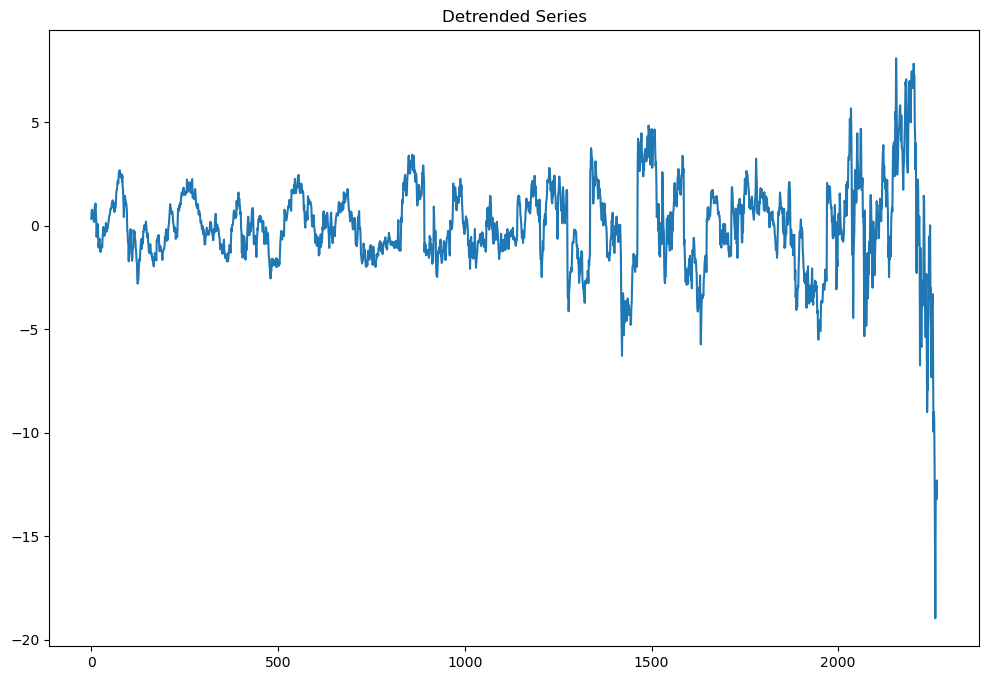

In [25]:
# Your code here
detrended_data.plot(figsize=(12,8), title='Detrended Series');

The resulting series looks detrended, except for the deviations from the overall trend in a few last observations.

Finishing this section, let's plot the components of our forecast using a `.plot_components` method. This will allow us to inspect the trend and the seasonality components of the data.

**Q9. Call the `.plot_components` method on your existing `Propet` object providing the `model_predictions` DataFrame as an input. Save the resulting plot in a new `components_plot` variable.**

<br>

/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

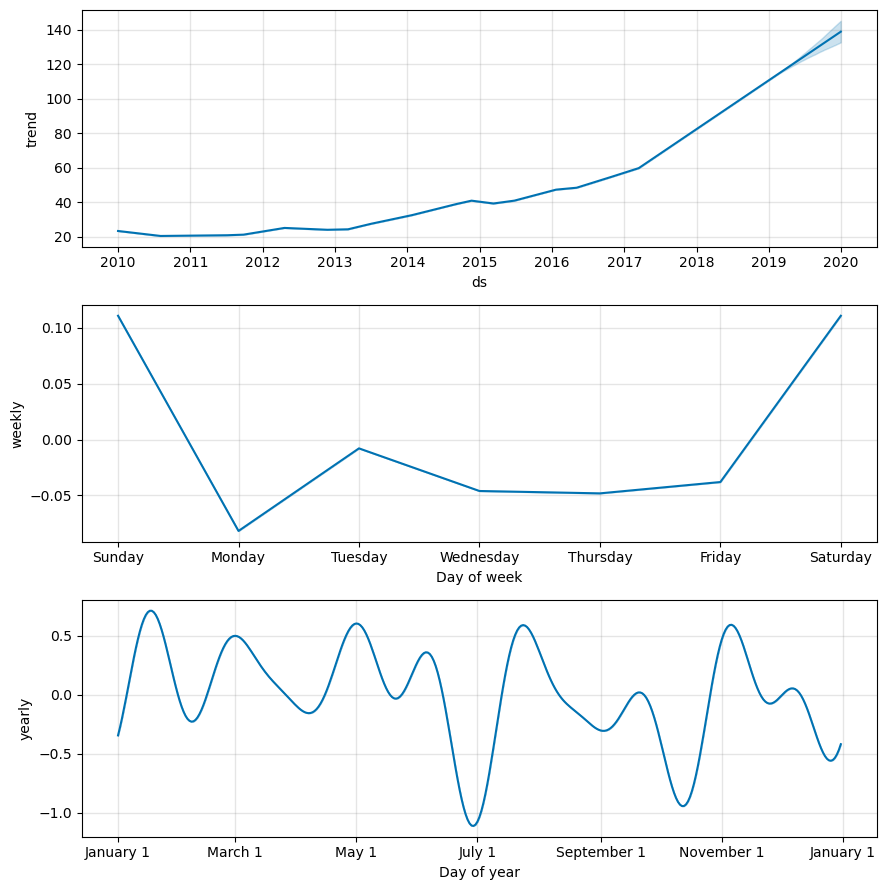

In [26]:
# Your code here
components_plot = forecast_model.plot_components(model_predictions)


These are the elements that the model detected in the data - an upward trend, a slight weekly seasonality, and highly changing yearly seasonality, an overfit in this case.

## Compare the forecast to historical values

We have generated a forecast for a whole year. Let's check how well it compares to the actual performance of the Microsoft stock in the year 2019.

We plot the actual historical daily prices of the Microsoft stock as red dots on the same plot showing the forecast. This allows us to visually check how accurate the forecast was.

If the previous steps were performed correctly, uncomment the code below to get the plot of actual observations alongside the forecast.

<br>

/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/var/folders/00/h4l_zl594z1g4kp3qw9d3bdc0000gn/T/ipykernel_98609/3036818454.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(pd.to_datetime(dat

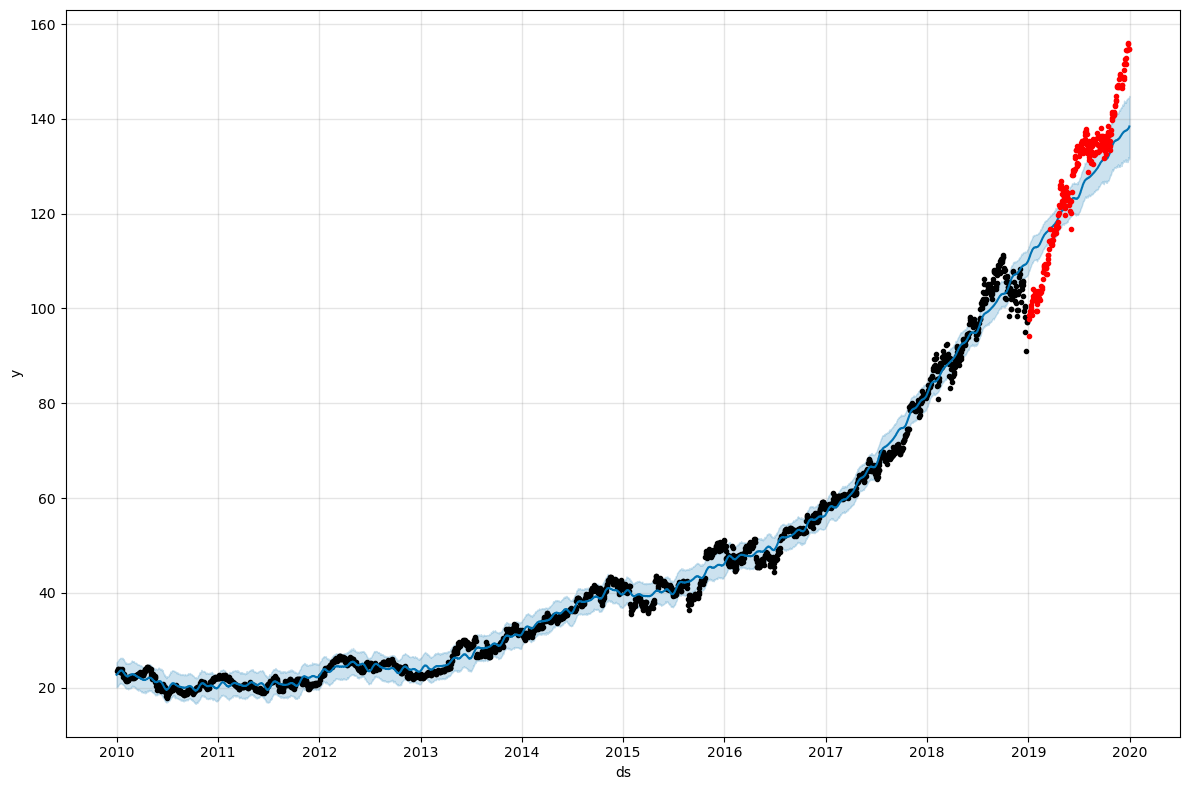

In [27]:
# Your code here
fig = forecast_model.plot(model_predictions, figsize=(12,8))
ax = fig.gca()
ax.plot(pd.to_datetime(data_test['ds']), data_test['y'], 'k.', color='r');

We see that even though the last observations in 2018 are below the trend series, the observations from 2019 continued moving upward. So our forecast using this model was correct in predicting the overall trend.

However, the individual observations are far from the trend line. In the first half of 2019, we see that the observations are significantly lower than the forecasted price. In the second half, the observations are, on average, higher than the forecasted price.

Let's calculate a few performance metrics for the test period to see how far our forecasts are from actual observed values. We'll calculate the statistics using the `diagnostics` module of the `prophet` library. We could also write our own functions for this or use those available in the `sklearn` library, but we'll be using this same `diagnostics` module later.

In order to use the `diagnostics` module, we need to create a DataFrame that contains the following columns:

| Parameter       | Description                                        |
|:---------------:| --------------------------------------------------:|
| ds              | Time of the forecast                               |
| yhat            | Forecast value                                     |
| yhat_lower      | Lower uncertainly interval of the forecast value   |
| yhat_upper      | Upper uncertainly interval of the forecast value   |
| y               | Observed value                                     |
| cutoff          | Cutoffs (used in cross validation)                 |

We can get the first four parameters series from the prediction DataFrame. The `y` parameter is the actual observed value from the `data_test` DataFrame. For the `cutoff`, we'll create a series containing the same value - the first day of the `data_test period`.

Uncomment the code below to use our previous variables to generate a suitable dataset.

In [28]:
# Your code here
predictions_table = model_predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][model_predictions['ds'] > '2019-01-01']
predictions_table['y'] = data_test['y']
predictions_table['cutoff'] = predictions_table['ds'].iloc[0]

predictions_table.head()



,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2265,2019-01-02,110.339348,107.811722,113.116078,97.782425,2019-01-02
2266,2019-01-03,110.487628,107.981845,113.064651,94.185219,2019-01-02
2267,2019-01-04,110.654534,107.911843,113.251310,98.565697,2019-01-02
2268,2019-01-07,111.103564,108.476336,113.895697,98.691406,2019-01-02
2269,2019-01-08,111.343598,108.705928,114.050516,99.406975,2019-01-02


Now we can calculate the performance metrics using `performance_metrics` function from the `diagnostics` module of the `prophet` library. Note that we've *already imported this function* at the beginning of the notebook.

**Q10. Calculate the performance metrics for our forecasts using `performance_metrics` function. Use the `predictions_table` as an input, and a parameter `rolling_window=1` to calculate metrics for the entire period. Save the output in a new variable `forecast_metrics`.**

<br>

In [29]:
# Your code here
forecast_metrics = performance_metrics(predictions_table, rolling_window=1)


We can now check the performance of our forecast.

We are provided with the following measures:
* Mean squared error (MSE)
* Root mean squared error (RMSE)
* Mean absolute error (MAE)
* Mean absolute percent error (MAPE)
* Median absolute percent error (MdAPE)
* Coverage - a percentage of observations that fall between Lower and Upper uncertainly intervals of the forecast value (% of observations where `yhat_lower <= y <= yhat_upper`)

Check how the `forecast_metrics` looks - just print it below.

In [30]:
# Your code here
print(forecast_metrics)

   horizon        mse      rmse       mae      mape     mdape     smape  \
0 363 days  63.087801  7.942783  6.772991  0.053896  0.048674  0.054021   

   coverage  
0  0.293651  


## Cross Validation using past data

The measures described above can also be used to determine how well the model is fit to the past data. As we saw from the plots, the observed values (black dots) are different from the fit of the model (blue line). The more fit our model is to the train set, the lower the error metrics will during any observed period. We should also be careful not to overfit the model.

The cross validation tool that we're about to use is useful to assess the model fit. It can also be used to compare the fit of many Prophet models (with different parameters).

During the cross validation process, the model generates an out-of-sample forecast on a particular time range and compares this forecast with actual observations during that period. This is done at different points in time and with different forecasting horizons and allows to better understand if the model fits well to the dataset.

To use cross validation we'll need to call the same `performance_metrics` function as in the previous part, but the dataset to give to this function will be generated by the `prophet` library automatically. For this, we need a `cross_validation` function from the same `diagnostics` module. It *was also imported* in the beginning of this notebook.

**Q11. Generate a cross validation dataset using the `cross_validation` function. Use the `forecast_model` as input and parameters `horizon="252 days"` and `period = "504 days"`. Save the output in a new variable `cv_data`.**

**Note:** This step is not instant and the `cross_validation` function will take some time to run.

**Note:** If you are running this locally, the `cross_validation` may give the following error: **ImportError: IProgress not found.** To fix it simply run the following command on Mac and Linux:

```
pip install ipywidgets
```
<br>

In [31]:
# Your code here
cv_data = cross_validation(forecast_model, horizon='252 days', period='504 days')


  0%|          | 0/5 [00:00<?, ?it/s]

16:44:22 - cmdstanpy - INFO - Chain [1] start processing
16:44:23 - cmdstanpy - INFO - Chain [1] done processing
16:44:23 - cmdstanpy - INFO - Chain [1] start processing
16:44:23 - cmdstanpy - INFO - Chain [1] done processing
16:44:23 - cmdstanpy - INFO - Chain [1] start processing
16:44:23 - cmdstanpy - INFO - Chain [1] done processing
16:44:23 - cmdstanpy - INFO - Chain [1] start processing
16:44:23 - cmdstanpy - INFO - Chain [1] done processing
16:44:24 - cmdstanpy - INFO - Chain [1] start processing
16:44:24 - cmdstanpy - INFO - Chain [1] done processing


Now we can calculate the performance metrics with different horizons, using the already familiar `performance_metrics` function.

**Q12. Calculate the performance metrics for the cross validation dataset `performance_metrics` function. Don't use any additional input parameters. Save the output in a new variable `cv_metrics`.**

<br>

In [32]:
cv_data

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-10-16,25.328858,24.597211,26.042910,24.344437,2012-10-15
1,2012-10-17,25.384507,24.625290,26.108638,24.426998,2012-10-15
2,2012-10-18,25.516898,24.789890,26.251163,24.352694,2012-10-15
3,2012-10-19,25.563164,24.829911,26.291121,23.642761,2012-10-15
4,2012-10-22,25.834904,25.064752,26.600935,23.114428,2012-10-15
...,...,...,...,...,...,...
862,2018-12-24,104.454908,100.056365,109.024832,91.023140,2018-04-23
863,2018-12-26,104.481364,99.983093,109.259967,97.240913,2018-04-23
864,2018-12-27,104.486121,100.199944,109.235157,97.840439,2018-04-23
865,2018-12-28,104.550024,100.358867,108.931819,97.076523,2018-04-23


In [33]:
# Your code here
cv_metrics = performance_metrics(cv_data)


We can now check the performance measures across different horizons. Loot at the `.head()` of `cv_metrics`.

In [34]:
# Your code here
cv_metrics.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,24 days,3.714490,1.927301,1.529710,0.034768,0.028017,0.034243,0.583721
1,25 days,3.897075,1.974101,1.589857,0.035933,0.028640,0.035394,0.572093
2,28 days,4.165570,2.040973,1.650183,0.037177,0.028731,0.036618,0.546512
3,29 days,4.496896,2.120589,1.729337,0.039055,0.032218,0.038448,0.523256
4,30 days,4.810024,2.193177,1.771594,0.040020,0.033158,0.039378,0.511628


Even more, we can plot a specific error measure that we're interested in optimising and compare plots later.

To do this, we'll use the `plot_cross_validation_metric` function from the `plot` submodule of the `prophet` library, that we've *imported already*.

The inputs to this function will be the generated cross validation dataset from the `cross_validation` function, and **not** the recently calculated performance metrics dataframe.

We also need to provide a metric that we want to plot. It can be any from the `["mse", "rmse", "mae", "mape", "mdape", "coverage"]` list.

Now, here comes the last question for this notebook!

**Q13. Plot the `mape` performance metric based on our cross validation dataset using the `plot_cross_validation_metric` function. Save the output in a new variable `cv_mape_plot`.**

<br>

/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:544: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/hlz/miniconda3/lib/python3.11/site-packages/prophet/plot.py:545: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


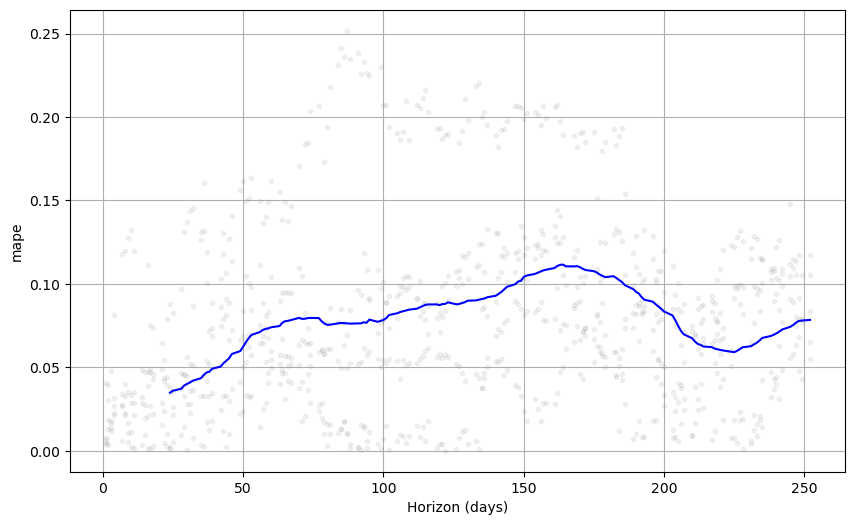

In [35]:
# Your code here
cv_mape_plot = plot_cross_validation_metric(cv_data, metric='mape',)


This plot shows the Mean absolute percent error (MAPE) for each cross validation prediction (grey dots), along with the MAPE averaged over rolling windows of 10% of data (10% is a default value). If you want to change the rolling window to 30%, use the `rolling_window=0.3` as a parameter of the `plot_cross_validation_metric` function.

## Final notes

To make more successful forecasts with Prophet, use and combine the tools described above.

For example, change the specification of the Prophet model (assume no weekly seasonality, for example, or add a custom seasonality), then test the fit of that model using a cross validation tool that we've just covered in questions 11-13. One can go further and apply hyperparameter tuning of the Prophet model parameters. Then choose the configuration that shows the best performance metric, as MAPE. 

One should be cautious when making forecasts. This notebook serves as an example of using the Prophet model, not as a recommendation to make financial decisions.

Although, one may be able to find some dates when the price change was abnormal and add these to the model. However, that is more suitable for the time series of stock returns and not prices.

Good luck with your experiments and using the Prophet model in practice!